# Linear Regression with PyTorch

## 1 Installing PyTorch

PyTorch is a Python frontend for Deep Learning applications developed by a Facebook research group. It can be used for a wide range of applications, and provides out-of-the box CUDA support, if it is installed. 

You can install PyTorch with conda, pip, or compile it from source. The official website shows which command can be used to install PyTorch on your system:
https://pytorch.org/

If you have a CUDA compatible graphics card on your workstation, you can install CUDA first (in case you have not yet) and select the corresponding version on the PyTorch website. CUDA can be downloaded here: https://developer.nvidia.com/cuda-zone.

We now import the PyTorch library to Python:

In [1]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F

Next, we need to import libraries for plotting and mathematical computations.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## 2 Dataset

In Machine Learning, many data sets have been established as standard cases such as the benchmarks MNIST and CIFAR (more on that later). For our simple Linear Regression model, we are going to generate some artificial data.

For simplicity, we assume that $m=n=1$, i.e. we are trying to predict scalars from scalars.

In [3]:
x_data = Variable(torch.Tensor([[10.0], [9.0], [3.0], [2.0]]))
y_data = Variable(torch.Tensor([[90.0], [80.0], [50.0], [30.0]]))

Text(0, 0.5, 'y')

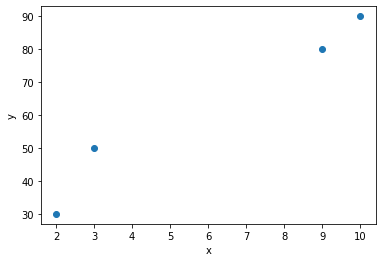

In [4]:
# Visualize
plt.plot(x_data.numpy(), y_data.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

## 3 Model Definition

We need to define what model we want to use for the prediction. In our simplified case, both input and output are elements of $\mathbb{R}$. 
In PyTorch, this is going to be reflected by 

`torch.nn.Linear(1, 1)`: We have one linear layer that takes 1-dimensional vectors and returns 1-dimensional vectors.

We are going to define our model as a `class LinearRegressionModule`. To ensure compatibility with PyTorch, our model is a subclass of the PyTorch native `Module` class.

The model is defined by its forward pass (its prediction step), which needs to be defined as a method of the class.

In [5]:
class LinearRegressionModel(torch.nn.Module):
    # define model as subclass of the PyTorch-native Module class
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        prediction = self.linear(x)
        return prediction

In [6]:
# initialise the model
lr_model = LinearRegressionModel()

## 4 Loss Function

As indicated in the lecture, the criterion which we minimise is going to be the Mean-Squared Error (sometimes called MSE, in the lecture $\boldsymbol{\varepsilon}$). 

Luckily, this is already implemented in PyTorch. We just have to select it as a loss function of our model. The argument `reduction='mean'` herein indicates that the sum of squared errors is going to be scaled by the sample size.

In [7]:
criterion = torch.nn.MSELoss(reduction='mean')

## 5 Optimizer

Next, we can choose between the most common minimisation algorithms which are already implemented in the [PyTorch Optim module](https://pytorch.org/docs/stable/optim.html). Here, we choose a variant of Gradient Descent, called the [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) with **Learning Rate $0.01$**.

In [8]:
learning_rate = .01
optimizer = torch.optim.SGD(lr_model.parameters(), lr=learning_rate)

## 6 Training the model

This is the crucial **learning step**. We run our model through 20 iterations (here, this is called _epochs_).

**Backward pass** is where the update of the learned parameters by the minimization algorithm is done. 

The following code block contains a loop over all epochs, runs one forward pass of the data, computes the loss, and updates to get the next step. 

As you see, PyTorch allows a user to implement a Machine Learning algorithm without specific knowledge of the optimization algorithm. Therefore, as Mathematicians, it is especially important to be aware of what the iteration is really doing!

Epoch 50 of 600: Loss is 97.83135223388672
Epoch 100 of 600: Loss is 68.4818344116211
Epoch 150 of 600: Loss is 50.839012145996094
Epoch 200 of 600: Loss is 40.23340606689453
Epoch 250 of 600: Loss is 33.85809326171875
Epoch 300 of 600: Loss is 30.025686264038086
Epoch 350 of 600: Loss is 27.721935272216797
Epoch 400 of 600: Loss is 26.337081909179688
Epoch 450 of 600: Loss is 25.504606246948242
Epoch 500 of 600: Loss is 25.004175186157227
Epoch 550 of 600: Loss is 24.70336151123047
Epoch 600 of 600: Loss is 24.522531509399414


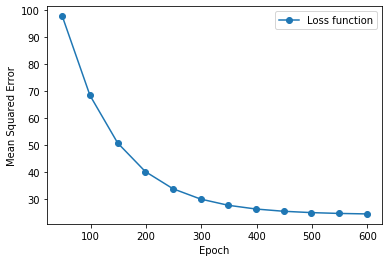

In [9]:
n_epochs = 600

losses_for_plot = []
epochs_for_plot = []

for epoch in range(n_epochs):
    lr_model.train()
    optimizer.zero_grad()

    # Predict from x using the current weights
    y_pred = lr_model(x_data)

    # Compute the Mean Square Error (or whatever loss is chosen)
    loss = criterion(y_pred, y_data)

    # Update the weights
    loss.backward()
    optimizer.step()
    
    # output something
    if ((epoch+1)%50)==0:
        
        losses_for_plot.append(loss)
        epochs_for_plot.append(epoch)
        print("Epoch {} of {}: Loss is {}".format(epoch+1, n_epochs, loss))
        
# plot loss per epoch
plt.plot(epochs_for_plot, losses_for_plot, 'o-')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(["Loss function"])

The minimization procedure looks trustworthy. Let us now see how the model can be used to predict new values.

## 7 Predicting

First of all, let us define a new value for $x$ and predict its value. A plot will give us an intuition of the accuracy of the prediction, _but never more than an intuition_.

Text(0, 0.5, 'y')

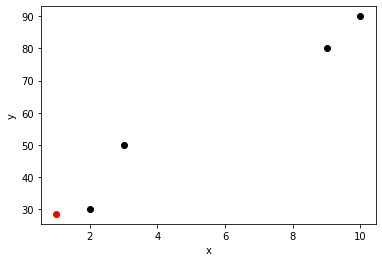

In [10]:
x = Variable(torch.Tensor([[1.0]]))
y_pred = lr_model(x).data[0][0]

#plot the given values and the new one
plt.plot(x_data.numpy(), y_data.numpy(), 'ko')
plt.plot(x.numpy(), y_pred.numpy(), 'ro')
plt.xlabel('x')
plt.ylabel('y')

Now, let us predict an entire line and visualise how it fits the data set. Keep in mind that a line is defined by two values.

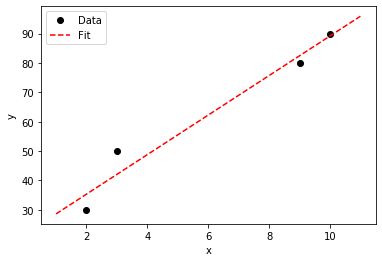

In [11]:
x2 = Variable(torch.Tensor([[11.0]]))
y_pred2 = lr_model(x2).data[0][0]

plt.plot(x_data.numpy(), y_data.numpy(), 'ko')
plt.plot([x.numpy()[0][0], x2.numpy()[0][0]], [y_pred.numpy(), y_pred2.numpy()], 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data',http://localhost:8888/notebooks/linear_regression.ipynb# 'Fit'])

## 8 Printing the parameters

To put this simple one-dimensional example into a Machine Learning language: Here, we learned parameters $(W, b)$, both elements of $\R$, such that $y=Wx+b$.
In such a language, $W$ is called the **weight**, and $b$ is called the **bias** of the model.

In [27]:
W, b = lr_model.linear.weight, lr_model.linear.bias
print("Weight W = {}\nBias b = {}".format(W[0][0], b[0]))

Weight W = 6.727228164672852
Bias b=21.876956939697266
